In [15]:
import pandas as pd
import plotly.graph_objects as go

file_name = '~/Bureau/Master2/Q2/BIG-PROJECT-DATA/MILESTONE 3/DATASETS/clean/belgium_information.csv' 
bel_info = pd.read_csv(file_name)
bel_info.tail()

,Years,population,gdp per capita,Carbon intensity of fossil energy,primary intensity,nuclear consumption,renewable consumption,fossil consumption
34,2014,11159407,47912.767751,1.009452,0.000906,2.897936,0.770421,39.729449
35,2015,11209057,41230.023127,1.007713,0.001089,2.244454,0.863715,41.781945
36,2016,11274196,42225.346541,1.010970,0.001102,3.742304,0.861393,41.925691
37,2017,11331422,44390.236671,1.011111,0.001045,3.630868,0.962683,41.811288
38,2018,11375158,47714.598083,1.008636,0.000970,2.458899,1.098366,42.732485


In [16]:
plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=bel_info['Years'],
                y=bel_info['fossil consumption'],
                name="Fossil energy consumption",
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=bel_info['Years'],
                y=bel_info['renewable consumption'],
                name="Renewable energy consumption",
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=bel_info['Years'],
                y=bel_info['nuclear consumption'],
                name="Nuclear energy consumption",
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text="Primary energy consumption")

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Energy consumption[Mtoe]"),

fig.show()

In [17]:
file_name = '~/Bureau/Master2/Q2/BIG-PROJECT-DATA/MILESTONE 3/DATASETS/clean/energy_emission_bel.csv' 
bel_emi = pd.read_csv(file_name)
bel_emi.tail()

,Years,CO2 gas,CO2 coal,CO2 oil,CO2 nuclear,CO2 wind,CO2 solar,CO2 hydro,CO2 fossil,CO2 renewable,CO2 primary
34,2014,27.885880,12.211840,43.961300,0.539248,0.055380,0.132618,0.067252,84.059020,0.255250,84.853518
35,2015,30.392254,12.295170,46.798093,0.417648,0.066888,0.140438,0.065228,89.485517,0.272554,90.175719
36,2016,31.329701,11.619851,45.686551,0.696368,0.065244,0.142232,0.068494,88.636103,0.275970,89.608441
37,2017,31.557916,11.398655,44.276616,0.675632,0.078132,0.151248,0.064262,87.233187,0.293642,88.202461
38,2018,32.437073,15.399153,43.661663,0.457552,0.089988,0.182712,0.059938,91.497890,0.332638,92.288080


In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=bel_emi['Years'],
                y=bel_emi['CO2 fossil'],
                name="CO2 emission of Fossil energy",
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=bel_emi['Years'],
                y=bel_emi['CO2 renewable'],
                name="CO2 emission of renewable energy",
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=bel_emi['Years'],
                y=bel_emi['CO2 nuclear'],
                name="CO2 emission nuclear energy",
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text="CO2 emission of primary energy")

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="CO2 emission [Mt CO2]"),

fig.show()

In [19]:
months = ['Fossil energy', 'Renewable energy', 'Nuclear energy']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[bel_emi['CO2 fossil'][38],
       bel_emi['CO2 renewable'][38],
       bel_emi['CO2 nuclear'][38]],
    name="Consumption of energy [Mtoe]"
))

fig.add_trace(go.Bar(
    x=months,
    y=[bel_info['fossil consumption'][38],
       bel_info['renewable consumption'][38],
       bel_info['nuclear consumption'][38]],
    name="CO2 emission of energy [Mt CO2]"
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group',
                  xaxis_tickangle=-45, title_text="Consumption and CO2 emission of primary energy in 2018")
fig.show()

### Scatter plot ###
Also go see R code

In [20]:
bel_info = bel_info.drop("Years", axis=1)

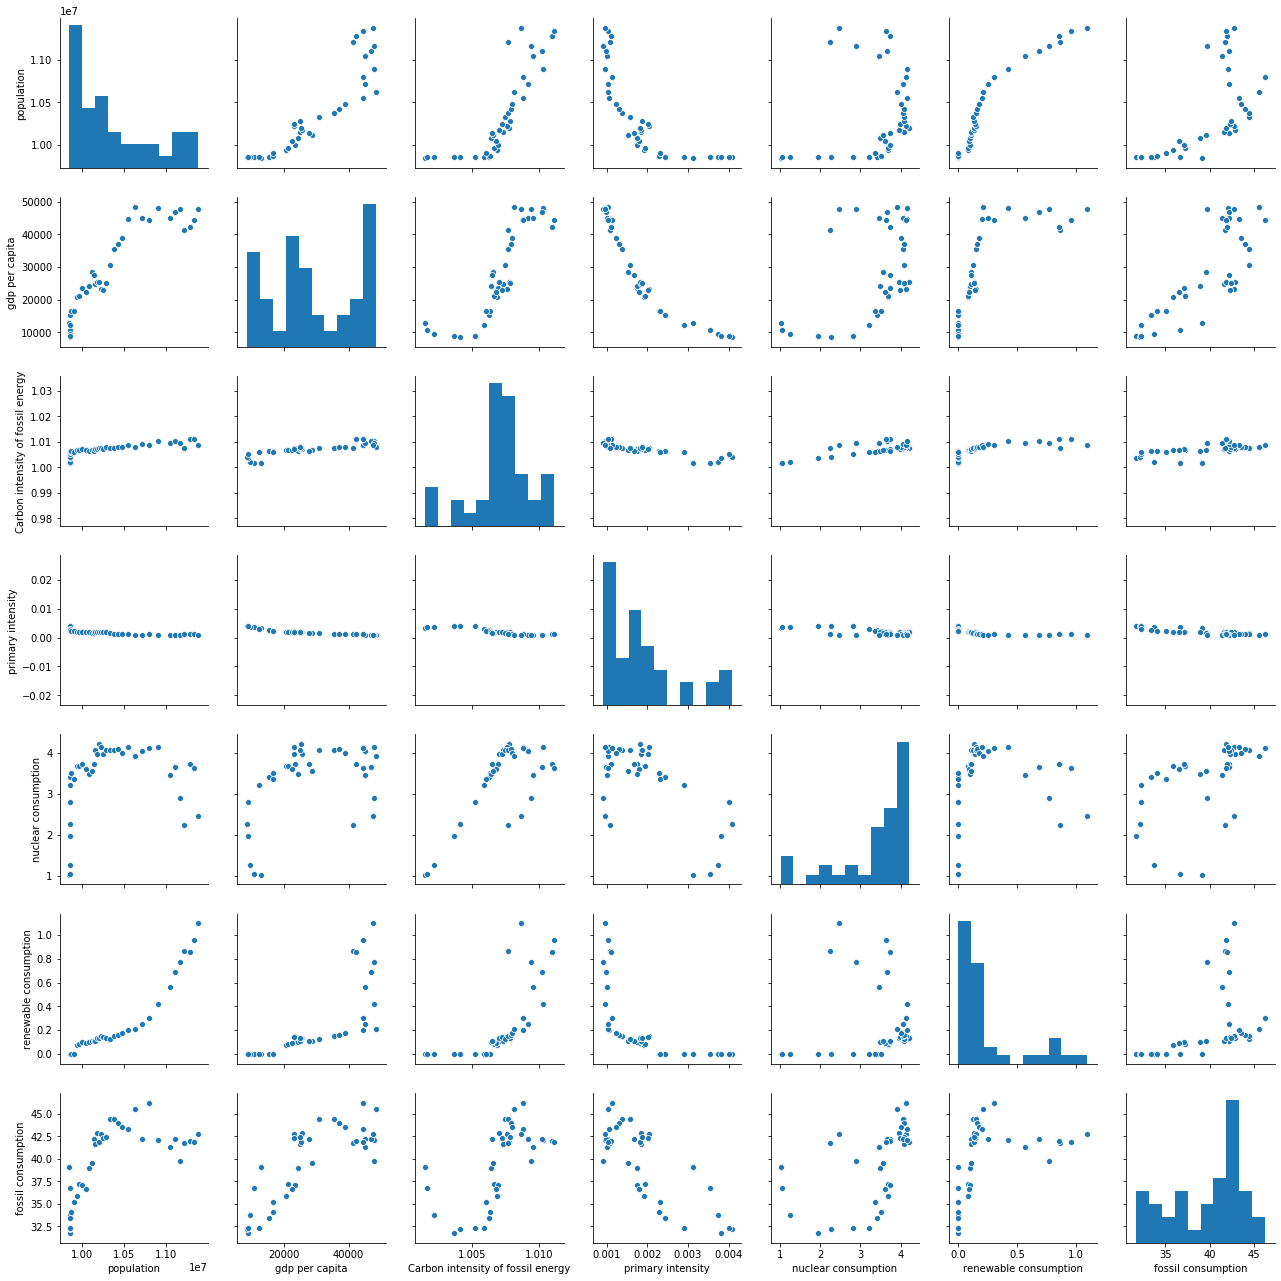

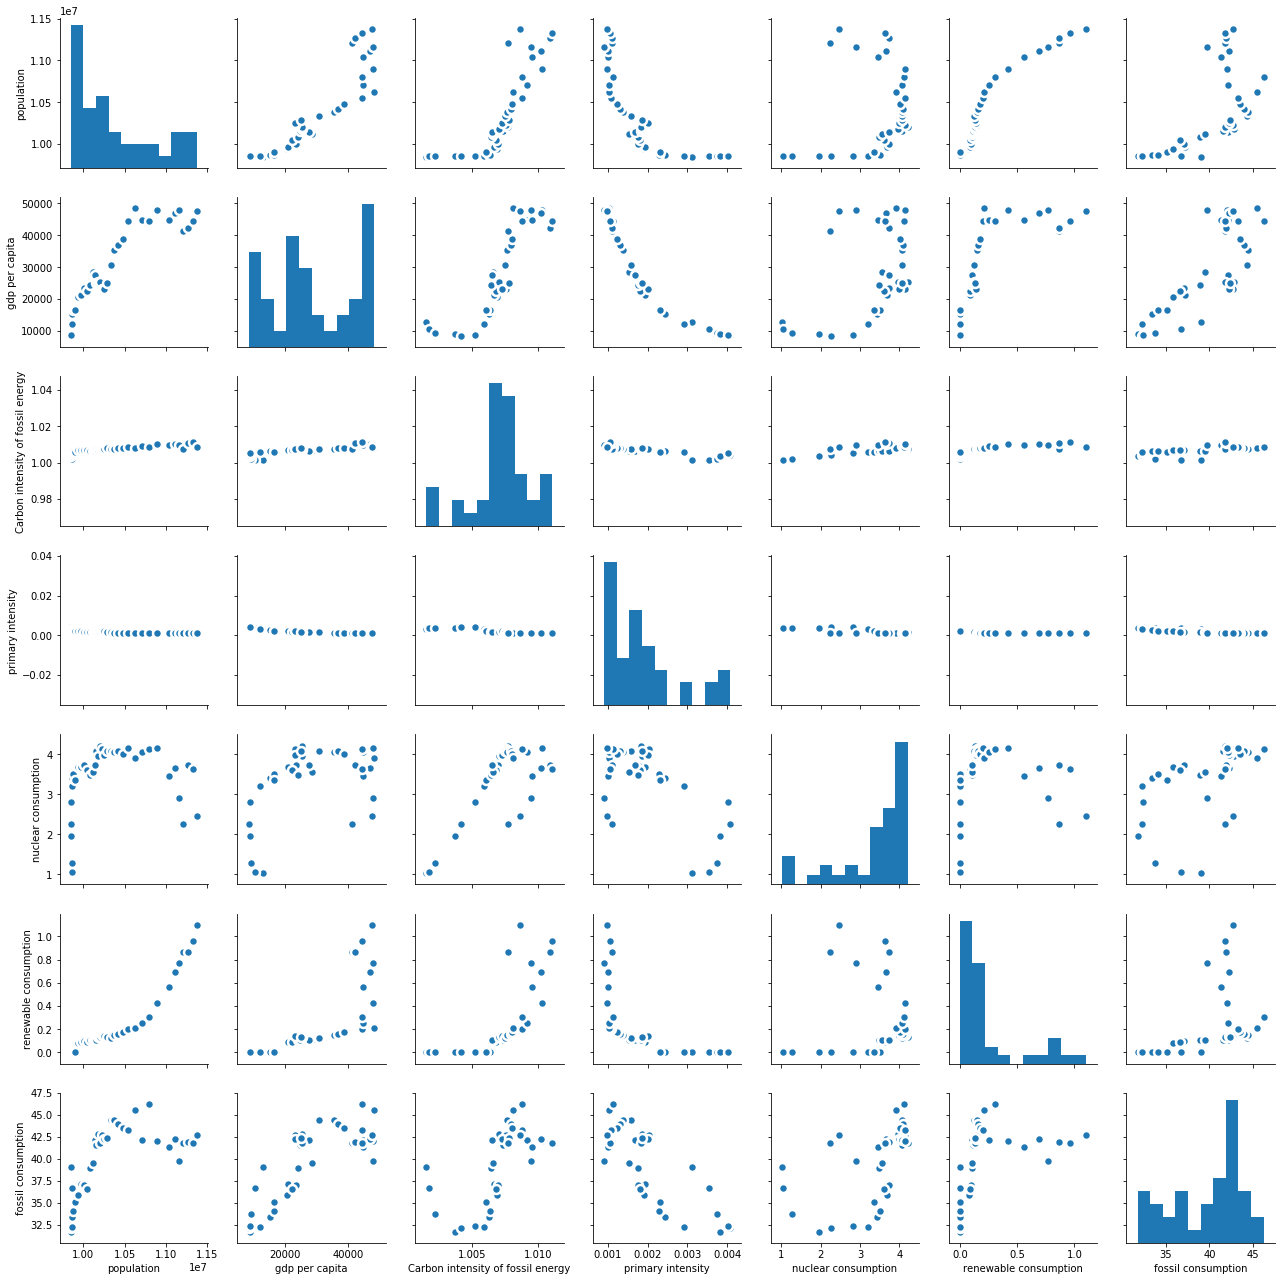

In [21]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
 
# left
sns.pairplot(bel_info, kind="scatter", palette="Set2")
plt.show()
 
# right: you can give other arguments with plot_kws.
sns.pairplot(bel_info, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [32]:
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr= LinearRegression()

data = bel_info.to_numpy()

x_train = data[:,0:6]
y_train = data[:,6:7]

# Fit linear regression.
mlr.fit(x_train, y_train)

# Get the slope and intercept of the line best fit.
print(mlr.intercept_)
# 
print(mlr.coef_)
#
predicted = mlr.predict(x_train)

[5396.15424426]
[[ 2.14142809e-05 -2.76822051e-05 -5.56747508e+03 -1.33881032e+03
   9.63011657e+00 -1.33836796e+00]]


#### Last coefficient is equal to zero !! Renewable energy has no impact on the consumption of co2 energy, which is normal looking to the dataset we have####

In [33]:
y_train = np.resize(data[:,6:7], (1,len(predicted)))[0]
y_train = pd.Series(y_train)
predicted = np.resize(predicted, (1,len(predicted)))[0]
predict = pd.Series(predicted)

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=bel_emi['Years'],
                y=predicted,
                name="Fitted (with least square regression)",
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=bel_emi['Years'],
                y=y_train,
                name="Real",
                opacity=0.8))


# Use date string to set xaxis range
fig.update_layout(title_text="Consumption of fossil energy")
                  

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Consumption [Mtoe]"),

fig.show()

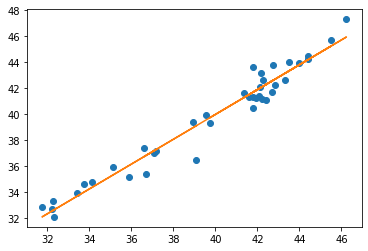

In [35]:
plt.plot(y_train, predicted, 'o')

m, b = np.polyfit(y_train, predicted, 1)

plt.plot(y_train, m*y_train + b)

#### Scenario based forecasting (AR) for each variable  ####

1. PLOT all the variable 
2. You can either use simple methods (AR,etc) to predict the behaviour
3. You can choose a scenario (value for each variable)
Read this it might be important !! https://otexts.com/fpp2/forecasting-regression.html

In [75]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

years = list()
for i in range(39) : years.append(1980+i)

# Initialize figure with subplots
fig = make_subplots(
    rows=3, cols=3, subplot_titles=("Belgian population", "Belgian gdp per capita",
                                    "Belgian carbon intensity of fossil energy",
                                    "Belgian primary energy intensity",
                                    "Nuclear energy consumption",
                                    "Renewable energy consumption",
                                    "", "Fossil energy consumption"
                                    )
)


# Add traces
fig.add_trace(go.Scatter(x=years, y=bel_info['population']), row=1, col=1)
fig.add_trace(go.Scatter(x=years, y=bel_info['gdp per capita']), row=1, col=2)
fig.add_trace(go.Scatter(x=years, y=bel_info['Carbon intensity of fossil energy']), row=1, col=3)
fig.add_trace(go.Scatter(x=years, y=bel_info['primary intensity']), row=2, col=1)
fig.add_trace(go.Scatter(x=years, y=bel_info['nuclear consumption']), row=2, col=2)
fig.add_trace(go.Scatter(x=years, y=bel_info['renewable consumption']), row=2, col=3)
fig.add_trace(go.Scatter(x=years, y=bel_info['fossil consumption']), row=3, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Years", row=1, col=1)
fig.update_xaxes(title_text="Years", row=1, col=2)
fig.update_xaxes(title_text="Years", row=1, col=3)
fig.update_xaxes(title_text="Years", row=2, col=1)
fig.update_xaxes(title_text="Years", row=2, col=2)
fig.update_xaxes(title_text="Years", row=2, col=3)
fig.update_xaxes(title_text="Years", row=3, col=2)

"""
# Update yaxis properties
fig.update_yaxes(title_text="Population", row=1, col=1)
fig.update_yaxes(title_text="Gdp per capita", row=1, col=2)
fig.update_yaxes(title_text="Carbon intensity of fossil energy", row=1, col=3)
fig.update_yaxes(title_text="Primary energy intensity", row=2, col=1)
"""
fig.update_yaxes(title_text="Mtoe", row=2, col=2)
fig.update_yaxes(title_text="Mtoe", row=2, col=3)
fig.update_yaxes(title_text="Mtoe", row=3, col=2)


# Update title and height
fig.update_layout(title_text="", height=800, width=1000, showlegend=False)

fig.show()

In [76]:
# Analyser les coefs de la regression avec les graphs !!

In [77]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=bel_emi['Years'],
                y=predicted,
                name="Fitted (with least square regression)",
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=bel_emi['Years'],
                y=y_train,
                name="Real",
                opacity=0.8))


# Use date string to set xaxis range
fig.update_layout(title_text="Consumption of fossil energy")
                  

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Consumption [Mtoe]"),

fig.show()

Population : AR-MA-ARIMA model no assumption

gdp : assumption -> curseur

carbon intensity of fossil energy -> curseur

primary energy intensity -> curseur

nuclear consumption -> curseur

renewable consumption -> curseur

fossil consumption -> curseur